In [1]:
import pandas as pd

In [2]:
gold=pd.read_csv('data/LBMA-GOLD.csv')
bit=pd.read_csv('data/BCHAIN-MKPRU.csv')

In [3]:
temp=pd.merge(bit,gold,how='left',on='Date')

In [4]:
temp.columns=['date','bit','gold']

In [12]:
temp.fillna('-1',inplace=True)

In [14]:
temp.to_csv('trend.csv',index=False)

In [46]:
merge=pd.merge(bit,gold,how='left',on='Date')

In [50]:
# temp=merge.fillna(-1).drop('Date',axis=1)
# temp.to_csv('a.csv',header=False)

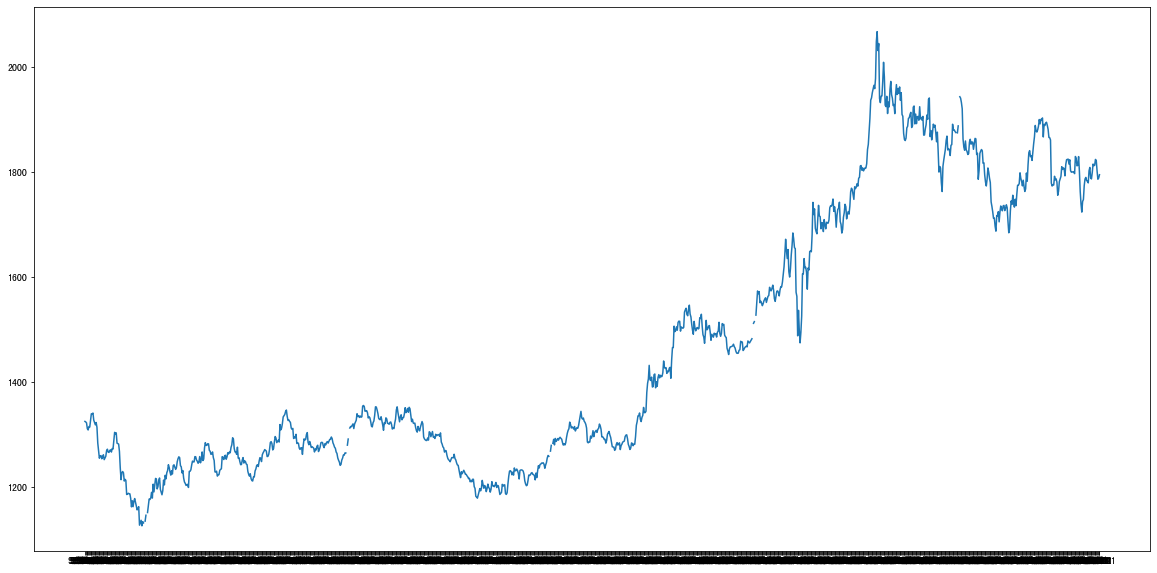

In [18]:
import matplotlib.pyplot as plt
fig,axis=plt.subplots(figsize=(20,10))
plt.plot(gold['Date'],gold['USD (PM)'])

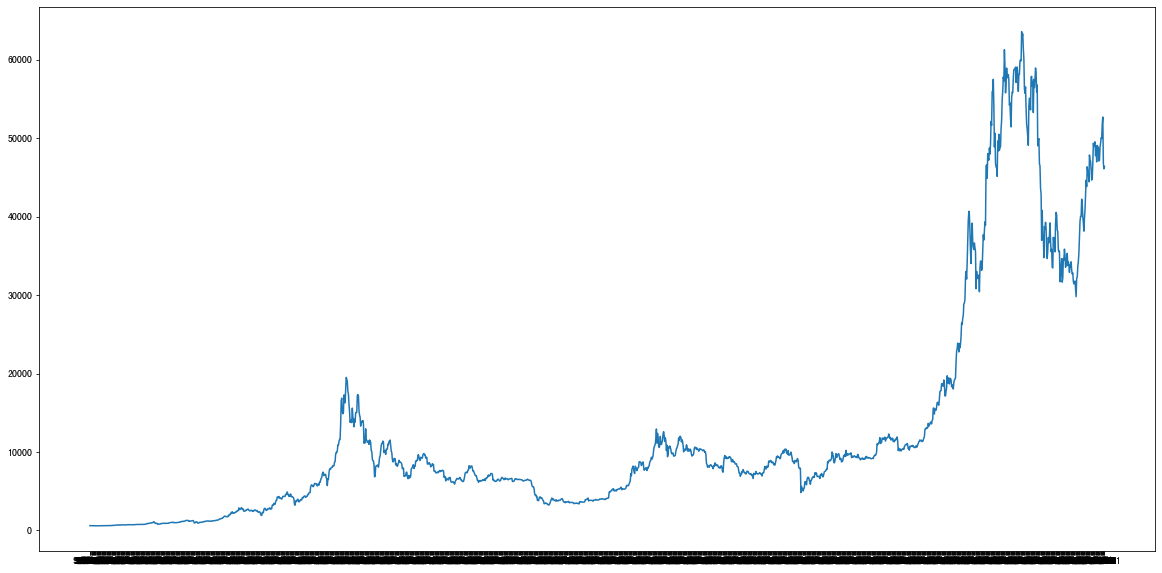

In [21]:
fig,axis=plt.subplots(figsize=(20,10))
plt.plot(bit['Date'],bit['Value'])

In [1]:
import torch
import pandas as pd
from GRU import GRU
net=torch.load('gru_gold.pth')

In [2]:
file_path = 'data/LBMA-GOLD.csv'
df = pd.read_csv(file_path)
df.dropna(inplace=True)
data=df[df.columns[1]]


In [3]:
m=data.mean()
std=data.std()

In [4]:
data=(data-m)/std

In [5]:
pred=[]
for i in range(10):
    pred.append(data[i]*std+m)
for i in range(len(data)-7):
    x=torch.tensor(data[i:i+7].values,dtype=torch.float32).cuda()
    y=net(x.view((1,7,1))).cpu()
    pred.append(torch.squeeze(y)[0].item()*std+m)

In [6]:
import matplotlib.pyplot as plt

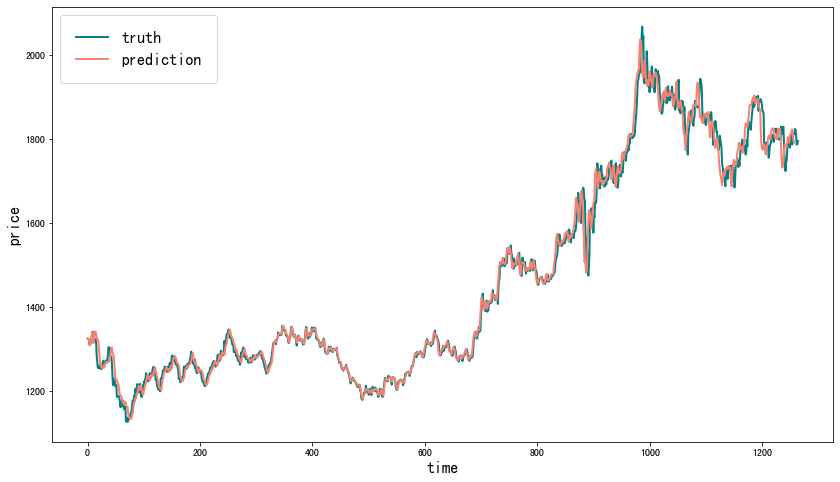

In [8]:
_=plt.figure(figsize=(14,8))
plt.plot(data*std+m,color='teal',label='truth',lw=2)
plt.plot(pred,color='salmon',label='prediction',lw=2)
plt.xlabel('time',fontsize=16)
plt.ylabel('price',fontsize=16)
plt.legend(loc='upper left',borderpad=1,prop= {'size':16})
plt.savefig('gru.png')